In [1]:
# from r'F:\DriversFireProject\NaturalNeighborResults\Daily\CumuDayLayer' 
# these layers only contain up to 85% of fire burned 
# create convexhull and calculate geometry (major.minor axis) for each cumulative day 
# take minor/major ratio and determine threshold 

In [1]:
import arcpy
from arcpy import env
from arcpy.sa import *
arcpy.overwriteoutput = True

env.workspace = "F:\DriversFireProject\TEMP"

In [2]:
import shutil
import pandas as pd
from datetime import datetime, date, time, timedelta
import requests
import zipfile
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
# get list of files based on directory and extension inputs 
def shpFiles(rootPath, ext):
    emptyList = []
    root = rootPath
    for path, subdirs, files in os.walk(root):
        for names in files: 
            if names.endswith(ext) and not names.startswith("._"):
                emptyList.append(path + '\\' + names)
    return(emptyList)

# Create new folder in root path 
def createFolder(rootPath, folderName): 
    folderPath = os.path.join(rootPath, folderName) 
    if not os.path.exists(folderPath):
        os.makedirs(folderPath)
    return folderPath + "\\" 

In [18]:
cumuShp = shpFiles(r'F:\DriversFireProject\NaturalNeighborResults\Daily\CumuDayLayer' , '.shp')
cumuShp

['F:\\DriversFireProject\\NaturalNeighborResults\\Daily\\CumuDayLayer\\2012\\Bagleycomplex\\Bagleycomplex_2012_231_NAT.shp',
 'F:\\DriversFireProject\\NaturalNeighborResults\\Daily\\CumuDayLayer\\2012\\Bagleycomplex\\Bagleycomplex_2012_232_NAT.shp',
 'F:\\DriversFireProject\\NaturalNeighborResults\\Daily\\CumuDayLayer\\2012\\Bagleycomplex\\Bagleycomplex_2012_233_NAT.shp',
 'F:\\DriversFireProject\\NaturalNeighborResults\\Daily\\CumuDayLayer\\2012\\Bagleycomplex\\Bagleycomplex_2012_234_NAT.shp',
 'F:\\DriversFireProject\\NaturalNeighborResults\\Daily\\CumuDayLayer\\2012\\Bagleycomplex\\Bagleycomplex_2012_235_NAT.shp',
 'F:\\DriversFireProject\\NaturalNeighborResults\\Daily\\CumuDayLayer\\2012\\Bagleycomplex\\Bagleycomplex_2012_236_NAT.shp',
 'F:\\DriversFireProject\\NaturalNeighborResults\\Daily\\CumuDayLayer\\2012\\Bagleycomplex\\Bagleycomplex_2012_237_NAT.shp',
 'F:\\DriversFireProject\\NaturalNeighborResults\\Daily\\CumuDayLayer\\2012\\Bagleycomplex\\Bagleycomplex_2012_238_NAT.shp',


In [21]:
outpath = r'F:\DriversFireProject\NaturalNeighborResults\Daily\ConvexHull\\'

fire = [] 
year = [] 
julianDay = [] 
MajorAxis = [] 
MinorAxis = [] 
Ratio = [] 

for cumu in cumuShp: 
    nm = cumu.split("\\")
    name = nm[-1]
    nmm = name.split("_")
    fr = nmm[0]
    yr = nmm[1]
    jd = nmm[2]
    yrfolder = outpath + str(yr)
    if not os.path.exists(yrfolder):
        os.makedirs(yrfolder)
    fireFolder = yrfolder + "\\" + fr
    if not os.path.exists(fireFolder):
        os.makedirs(fireFolder)
    # Use MinimumBoundingGeometry function to get a convex hull area
    #for each cluster of trees which are multipoint features
    convex = arcpy.MinimumBoundingGeometry_management(cumu, fireFolder + "\\" + name, 
                                         "CONVEX_HULL", "ALL", "", "MBG_FIELDS")
    with arcpy.da.SearchCursor(convex, ['MBG_Width', 'MBG_Length',]) as cursor:
            for row in cursor:
                try: 
                    Ratio.append(row[0]/row[1])
                    MajorAxis.append(row[0])
                    MinorAxis.append(row[1])
                    fire.append(fr) 
                    year.append(yr) 
                    julianDay.append(jd)
                    print(yr, fr, row[0]/row[1])
                except: 
                    continue
                
AxisDF = pd.DataFrame({'Fire': fire, 'Year': year,'JulianDay': julianDay, 
                       'MajorAxis': MajorAxis, 'MinorAxis': MinorAxis, 'Ratio':Ratio})
AxisDF

2012 Bagleycomplex 0.44642857142857145
2012 Bagleycomplex 0.6338028169014085
2012 Bagleycomplex 0.4336283185840708
2012 Bagleycomplex 0.5126050420168068
2012 Bagleycomplex 0.5241935483870968
2012 Bagleycomplex 0.6062992125984252
2012 Bagleycomplex 0.5379746835443038
2012 Bagleycomplex 0.7469135802469136
2012 Bagleycomplex 0.7633136094674556
2012 Bagleycomplex 0.7860962566844919
2012 Bagleycomplex 0.8074866310160428
2012 Chihuahua2 0.6046511627906977
2012 Chihuahua2 0.6046511627906977
2012 Chips 0.4
2012 Chips 0.576923076923077
2012 Chips 0.4651162790697675
2012 Chips 0.6825396825396824
2012 Chips 0.6
2012 Chips 0.5737704918032788
2012 Chips 0.6341463414634146
2012 Chips 0.6504065040650406
2012 Chips 0.6688741721854305
2012 Chips 0.6907894736842105
2012 Chips 0.7272727272727273
2012 Chips 0.6686390532544378
2012 Chips 0.6208791208791209
2012 Chips 0.712041884816754
2012 Chips 0.6728971962616822
2012 Chips 0.6444444444444444
2012 Chips 0.6460176991150441
2012 Chips 0.6108786610878661
201

2014 Butts 0.7049180327868853
2014 Cocos 0.7297297297297297
2014 Cocos 0.8636363636363636
2014 Coffeecomplex 0.5714285714285714
2014 Coffeecomplex 0.6382978723404255
2014 Coffeecomplex 0.8615384615384615
2014 Coffeecomplex 0.9242424242424242
2014 Coffeecomplex 0.9104477611940298
2014 Coffeecomplex 0.9104477611940298
2014 Darkhole 0.25
2014 Darkhole 0.2
2014 Darkhole 0.4
2014 Darkhole 0.5
2014 Darkhole 0.8333333333333334
2014 Darkhole 0.6521739130434783
2014 Darkhole 0.7307692307692308
2014 Darkhole 0.7777777777777778
2014 Darkhole 0.7857142857142857
2014 Darkhole 0.793103448275862
2014 Darkhole 0.793103448275862
2014 Darkhole 0.793103448275862
2014 Darkhole 0.793103448275862
2014 Darkhole 0.793103448275862
2014 Darkhole 0.793103448275862
2014 Darkhole 0.793103448275862
2014 Darkhole 0.8275862068965517
2014 Darkhole 0.8275862068965517
2014 Darkhole 0.8275862068965517
2014 Darkhole 0.8275862068965517
2014 Darkhole 0.7741935483870968
2014 Day 0.7272727272727273
2014 Day 0.3582089552238806

2015 Forkcomplexshiell 0.782051282051282
2015 Forkcomplexshiell 0.7625
2015 Forkcomplexshiell 0.7654320987654321
2015 Forkcomplexshiell 0.5675675675675675
2015 Forkcomplexshiell 0.5675675675675675
2015 Forkcomplexshiell 0.5423728813559322
2015 Forkcomplexshiell 0.6015625
2015 Forkcomplexshiell 0.6356589147286822
2015 Forkcomplexshiell 0.6692307692307692
2015 Forkcomplexshiell 0.6567164179104477
2015 Frog 0.6486486486486487
2015 Frog 0.5652173913043478
2015 Frog 0.5774647887323945
2015 Frog 0.5125
2015 Gasquetcomplexbear 0.2
2015 Gasquetcomplexbear 0.7142857142857143
2015 Gasquetcomplexbear 0.6
2015 Gasquetcomplexbear 0.6363636363636365
2015 Gasquetcomplexbear 0.48
2015 Gasquetcomplexbear 0.5384615384615385
2015 Gasquetcomplexbear 0.5555555555555556
2015 Gasquetcomplexbear 0.5555555555555556
2015 Gasquetcomplexbear 0.5714285714285714
2015 Gasquetcomplexbear 0.5862068965517242
2015 Gasquetcomplexbear 0.5862068965517242
2015 Gasquetcomplexbear 0.6
2015 Gasquetcomplexbear 0.8
2015 Gasquetc

2015 Rough 0.4143835616438356
2015 Rough 0.46562499999999996
2015 Rough 0.435672514619883
2015 Rough 0.43063583815028905
2015 Rough 0.4285714285714286
2015 Rough 0.4285714285714286
2015 Rough 0.5041782729805014
2015 Rough 0.5041782729805014
2015 Rough 0.46410256410256406
2015 Rough 0.419953596287703
2015 Rough 0.4117647058823529
2015 Rough 0.40265486725663713
2015 Rough 0.39999999999999997
2015 Rough 0.42857142857142855
2015 Rough 0.4229934924078091
2015 Rough 0.42207792207792205
2015 Rough 0.42116630669546434
2015 Rough 0.413135593220339
2015 Rough 0.4070247933884298
2015 Rough 0.4082474226804124
2015 Rough 0.39250493096646943
2015 Rough 0.39999999999999997
2015 Rough 0.42857142857142855
2015 Routecomplexbuck 0.64
2015 Routecomplexbuck 0.78125
2015 Routecomplexbuck 0.78125
2015 Routecomplexbuck 0.7575757575757576
2015 Routecomplexbuck 0.7878787878787878
2015 Routecomplexbuck 0.8235294117647058
2015 Routecomplexjohnson 0.5131578947368421
2015 Routecomplexjohnson 0.4581005586592179
2015

2016 Soberanes 0.4705882352941177
2016 Soberanes 0.460431654676259
2016 Soberanes 0.460431654676259
2016 Soberanes 0.4507042253521127
2016 Soberanes 0.4413793103448276
2016 Soberanes 0.4129032258064516
2016 Soberanes 0.4067796610169492
2016 Soberanes 0.3878787878787879
2016 Soberanes 0.384
2016 Soberanes 0.38247011952191234
2016 Soberanes 0.38095238095238093
2016 Soberanes 0.37944664031620556
2016 Soberanes 0.37065637065637064
2016 Soberanes 0.36923076923076925
2016 Soberanes 0.36923076923076925
2016 Soberanes 0.36923076923076925
2016 Soberanes 0.36923076923076925
2016 Soberanes 0.36923076923076925
2016 Soupcomplexsoup2 0.47619047619047616
2016 Soupcomplexsoup2 0.46551724137931033
2016 Trailhead 0.47619047619047616
2016 Trailhead 0.484375
2016 Trailhead 0.3902439024390244
2016 Trailhead 0.40909090909090906
2016 Willard 0.21
2016 Willard 0.2079207920792079
2017 Adobe 0.5
2017 Adobe 0.5221238938053097
2017 Alamo 0.7999999999999999
2017 Atlas 0.6581196581196581
2017 Atlas 0.47933884297520

2017 Empire 0.6428571428571428
2017 Empire 0.6428571428571428
2017 Empire 0.6428571428571428
2017 Empire 0.6428571428571428
2017 Empire 0.6428571428571428
2017 Empire 0.632183908045977
2017 Empire 0.632183908045977
2017 Empire 0.6111111111111112
2017 Empire 0.5978260869565217
2017 Empire 0.5978260869565217
2017 Empire 0.5978260869565217
2017 Empire 0.5978260869565217
2017 Empire 0.6847826086956522
2017 Empire 0.65625
2017 Empire 0.65625
2017 Empire 0.6666666666666666
2017 Empire 0.6666666666666666
2017 Empire 0.6666666666666666
2017 Empire 0.6666666666666666
2017 Empire 0.6666666666666666
2017 Empire 0.6666666666666666
2017 Empire 0.6666666666666666
2017 Empire 0.6666666666666666
2017 Empire 0.6597938144329897
2017 Empire 0.6597938144329897
2017 Empire 0.6597938144329897
2017 Empire 0.6597938144329897
2017 Empire 0.6597938144329897
2017 Empire 0.6597938144329897
2017 Empire 0.6597938144329897
2017 Gardensqf 0.5199999999999999
2017 Gardensqf 0.6052631578947368
2017 Garza 0.5783132530120

2017 Ruthcomplexdutchman 0.2790697674418605
2017 Ruthcomplexdutchman 0.2647058823529411
2017 Ruthcomplexwillie 0.6666666666666666
2017 Ruthcomplexwillie 0.4310344827586207
2017 Ruthcomplexwillie 0.41538461538461535
2017 Rye 0.3839285714285714
2017 Salmonaugustcomplexwallow 0.19999999999999998
2017 Salmonaugustcomplexwallow 0.21621621621621623
2017 Salmonaugustcomplexwallow 0.21621621621621623
2017 Salmonaugustcomplexwallow 0.22413793103448273
2017 Salmonaugustcomplexwallow 0.2809917355371901
2017 Salmonaugustcomplexwallow 0.3458646616541353
2017 Salmonaugustcomplexwallow 0.39259259259259255
2017 Salmonaugustcomplexwallow 0.3642384105960265
2017 Salmonaugustcomplexwallow 0.4161490683229814
2017 Salmonaugustcomplexwallow 0.4175824175824176
2017 Salmonaugustcomplexwallow 0.41621621621621624
2017 Salmonaugustcomplexwallow 0.44041450777202074
2017 Salmonaugustcomplexwallow 0.4432989690721649
2017 Salmonaugustcomplexwallow 0.4461538461538461
2017 Salmonaugustcomplexwallow 0.4615384615384615


2018 Lions 0.5604395604395604
2018 Lions 0.5604395604395604
2018 Lions 0.5604395604395604
2018 Lions 0.5604395604395604
2018 Lions 0.5604395604395604
2018 Lions 0.5604395604395604
2018 Lions 0.5604395604395604
2018 Lions 0.5604395604395604
2018 Lions 0.5604395604395604
2018 Lions 0.5604395604395604
2018 Lions 0.5604395604395604
2018 Lions 0.5604395604395604
2018 Lions 0.5714285714285714
2018 Lions 0.5652173913043478
2018 Lions 0.5531914893617021
2018 Lions 0.5199999999999999
2018 Lions 0.5199999999999999
2018 Lions 0.5599999999999999
2018 Lions 0.5315315315315315
2018 Lions 0.5315315315315315
2018 Lions 0.5315315315315315
2018 Lions 0.5315315315315315
2018 Lions 0.5315315315315315
2018 Lions 0.5315315315315315
2018 Lions 0.5315315315315315
2018 Lions 0.5221238938053097
2018 Lions 0.5221238938053097
2018 Lions 0.5398230088495575
2018 Lions 0.5398230088495575
2018 Lions 0.5398230088495575
2018 Lions 0.5350877192982456
2018 Lions 0.5333333333333333
2018 Lions 0.5416666666666667
2018 Lions

,Fire,Year,JulianDay,MajorAxis,MinorAxis,Ratio
0,Bagleycomplex,2012,231,0.025,0.056,0.446429
1,Bagleycomplex,2012,232,0.045,0.071,0.633803
2,Bagleycomplex,2012,233,0.049,0.113,0.433628
3,Bagleycomplex,2012,234,0.061,0.119,0.512605
4,Bagleycomplex,2012,235,0.065,0.124,0.524194
...,...,...,...,...,...,...
1880,Walker,2019,247,0.028,0.047,0.595745
1881,Walker,2019,248,0.035,0.084,0.416667
1882,Walker,2019,249,0.125,0.213,0.586854
1883,Walker,2019,250,0.154,0.260,0.592308


In [23]:
AxisDF.to_csv(r'F:\DriversFireProject\NaturalNeighborResults\MajorMinorAxisRatio_DF.csv')

NameError: name 'AxisDF' is not defined

In [7]:
AxisDF = pd.read_csv(r'F:\DriversFireProject\NaturalNeighborResults\MajorMinorAxisRatio_DF.csv', index_col=0)
AxisDF.dtypes

Fire          object
Year           int64
JulianDay      int64
MajorAxis    float64
MinorAxis    float64
Ratio        float64
dtype: object

In [8]:
FinalDF = pd.read_csv(r'F:\DriversFireProject\NaturalNeighborResults\FinalDF.csv', index_col=0)
FinalDF = FinalDF[['Fire', 'Year','JD_B', 'Area(ha)', 'direction', 'distance', 'FID_ca_eco', 'EcoRegion']]
#FinalDF['Year'] = FinalDF['Year'].astype(str)
#FinalDF['JD_B'] = FinalDF['JD_B'].astype(str)
Finalmerged = pd.merge(AxisDF,FinalDF, how='left',left_on=['Fire','Year', 'JulianDay'], right_on=['Fire','Year', 'JD_B'])
Finalmerged['Ratio']  = Finalmerged['Ratio'] * 100

In [9]:
MergedbyFire = Finalmerged.groupby(['FID_ca_eco', 'EcoRegion', 'Fire'])['Ratio'].agg('median').reset_index()
MergedbyFire

,FID_ca_eco,EcoRegion,Fire,Ratio
0,3,Cascades,Berry,37.209302
1,3,Cascades,Cove,46.666667
2,3,Cascades,Day,54.274084
3,3,Cascades,Eiler,64.928910
4,3,Cascades,Frog,57.134109
...,...,...,...,...
251,11,"California Coastal Sage, Chaparral, and Oak Wo...",Sandiegocomplexcocos,60.000000
252,11,"California Coastal Sage, Chaparral, and Oak Wo...",Shockey,15.463918
253,11,"California Coastal Sage, Chaparral, and Oak Wo...",Solimar,46.153846
254,11,"California Coastal Sage, Chaparral, and Oak Wo...",Tomahawk,66.000000


In [37]:
# first day shapes 
idx = Finalmerged.groupby(['FID_ca_eco', 'EcoRegion', 'Fire'])['JulianDay'].transform(min) == Finalmerged['JulianDay']
firstDay = Finalmerged[idx]
firstDay.groupby(['FID_ca_eco', 'EcoRegion'])['Ratio'].agg(['median']).reset_index()

,FID_ca_eco,EcoRegion,median
0,3,Cascades,56.756757
1,4,Sierra Nevada,52.535302
2,5,"California Coastal Sage, Chaparral, and Oak Wo...",52.307692
3,7,Klamath Mountains,48.888889
4,8,Southern and Baja California Pine-Oak Mountains,61.818182
5,11,"California Coastal Sage, Chaparral, and Oak Wo...",41.562500


In [38]:
# last day shapes
idx = Finalmerged.groupby(['FID_ca_eco', 'EcoRegion', 'Fire'])['JulianDay'].transform(max) == Finalmerged['JulianDay']
lastDay = Finalmerged[idx]
lastDay.groupby(['FID_ca_eco', 'EcoRegion'])['Ratio'].agg(['median']).reset_index()

,FID_ca_eco,EcoRegion,median
0,3,Cascades,51.470588
1,4,Sierra Nevada,57.944515
2,5,"California Coastal Sage, Chaparral, and Oak Wo...",52.212389
3,7,Klamath Mountains,57.303371
4,8,Southern and Baja California Pine-Oak Mountains,60.465116
5,11,"California Coastal Sage, Chaparral, and Oak Wo...",44.326923


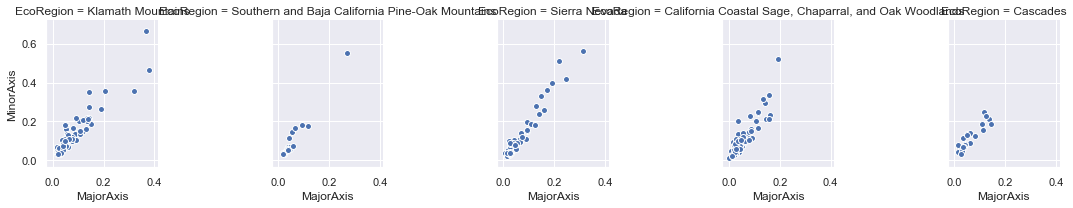

In [87]:
g = sns.FacetGrid(lastDay, col="EcoRegion")
g = g.map(plt.scatter, "MajorAxis", "MinorAxis", edgecolor="w")

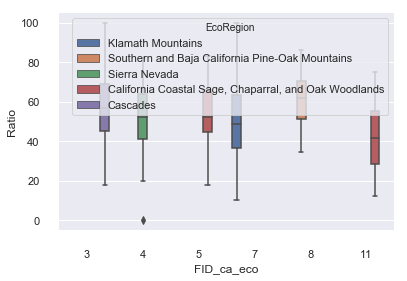

In [30]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="FID_ca_eco", y="Ratio",
            hue="EcoRegion",
            data=firstDay)
sns.despine(offset=10, trim=True)

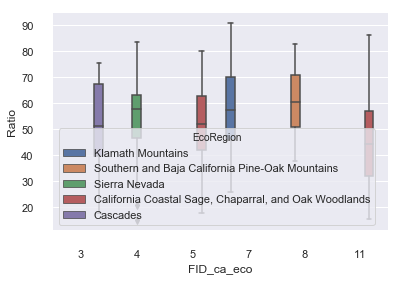

In [31]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="FID_ca_eco", y="Ratio",
            hue="EcoRegion",
            data=lastDay)
sns.despine(offset=10, trim=True)

In [96]:
# merge NIROPS shapefiles and interpolated files. 
nirops = shpFiles(r'F:\DriversFireProject\Merged_Daily_DIFF', '.shp')
interFiles = shpFiles(r'F:\DriversFireProject\NaturalNeighborResults\Daily\Dis_Shapefile', '.shp')
arcpy.Merge_management(interFiles, r"F:\DriversFireProject\GEE_Dataset\Interpolated_ALL.shp")

['F:\\DriversFireProject\\Merged_Daily_DIFF\\2012\\Antelope_2012_MergedDIFF.shp',
 'F:\\DriversFireProject\\Merged_Daily_DIFF\\2012\\Bagleycomplex_2012_MergedDIFF.shp',
 'F:\\DriversFireProject\\Merged_Daily_DIFF\\2012\\Banner_2012_MergedDIFF.shp',
 'F:\\DriversFireProject\\Merged_Daily_DIFF\\2012\\Bear_2012_MergedDIFF.shp',
 'F:\\DriversFireProject\\Merged_Daily_DIFF\\2012\\Buck_2012_MergedDIFF.shp',
 'F:\\DriversFireProject\\Merged_Daily_DIFF\\2012\\Calf_2012_MergedDIFF.shp',
 'F:\\DriversFireProject\\Merged_Daily_DIFF\\2012\\Cascade_2012_MergedDIFF.shp',
 'F:\\DriversFireProject\\Merged_Daily_DIFF\\2012\\Chihuahua2_2012_MergedDIFF.shp',
 'F:\\DriversFireProject\\Merged_Daily_DIFF\\2012\\Chips_2012_MergedDIFF.shp',
 'F:\\DriversFireProject\\Merged_Daily_DIFF\\2012\\Copco_2012_MergedDIFF.shp',
 'F:\\DriversFireProject\\Merged_Daily_DIFF\\2012\\Creek_2012_MergedDIFF.shp',
 'F:\\DriversFireProject\\Merged_Daily_DIFF\\2012\\Dale_2012_MergedDIFF.shp',
 'F:\\DriversFireProject\\Merged_Dail

POST-PROCESSING: Simplify and smooth out interpolated surfaces
    1. PAEK smooth polygon; 10 deg 
    2. Eliminate Polygon Part; Contained Parts only, 0.001 deg 
    3. Convert to raster 
    4. Focal Stats 3x3 smoothing 
    5. Convert back to shp; simplify 

In [8]:
interFiles = shpFiles(r'F:\DriversFireProject\NaturalNeighborResults\Daily\Dis_Shapefile', '.shp')
lastDayPath = r'F:\DriversFireProject\LastDayPerimeters\\'
outpath = r'F:\DriversFireProject\NaturalNeighborResults\Daily\SimplifiedSHP\\'
for inter in interFiles: 
    nm = inter.split("\\")
    name = nm[-1]
    nmm = name.split("_")
    fr = nmm[0]
    yr = nmm[1]
    print(fr, yr)
    # create new folder paths 
    yrPath = createFolder(outpath, yr)
    frPath = createFolder(yrPath, fr)
    tempPath = createFolder(outpath, "temp")
    try: 
        simp = arcpy.SmoothPolygon_cartography(inter, os.path.join(tempPath, fr + "_" + str(yr) + '_SIM.shp'), "PAEK", 10) 
        elim = arcpy.EliminatePolygonPart_management(simp, os.path.join(tempPath, fr + "_" + str(yr) + '_ELIM.shp'), "AREA", 0.001 , "", "CONTAINED_ONLY")
        ras = arcpy.PolygonToRaster_conversion(elim, "gridcode", 
                                     os.path.join(tempPath, fr + "_" + str(yr) + '_RAS.tif'), 
                                     "CELL_CENTER", "NONE", 0.0015)
        outFocalStat = FocalStatistics(ras, NbrCircle(8, "CELL"), "MEDIAN", "DATA")
        lastDayShp = os.path.join(lastDayPath, str(yr), fr + "_" + str(yr) + '_Fire_ALL.shp') 
        outExtractByMask = ExtractByMask(outFocalStat, lastDayShp)
        poly = arcpy.RasterToPolygon_conversion(outExtractByMask, os.path.join(tempPath, name) , "SIMPLIFY","VALUE")
        arcpy.Dissolve_management(poly, os.path.join(frPath, name), "gridcode", "", "MULTI_PART", "DISSOLVE_LINES")
        shutil.rmtree(tempPath)
    except: 
        print("error: ", fr, yr)
        arcpy.CopyFeatures_management(inter, os.path.join(frPath,name))
        continue

    

Bagleycomplex 2012
Banner 2012
Chihuahua2 2012
Chips 2012
Dale 2012
error:  Dale 2012
Fortcomplex 2012
Fortcomplexgoff 2012
George 2012
Highland 2012
error:  Highland 2012
Jawbonecomplex 2012
Likely 2012
Mdflakecomplex 2012
Northpass 2012
Pass 2012
Piutecomplexclear 2012
Ramsey 2012
Reading 2012
Robbers 2012
Rush 2012
Rushfire 2012
Scotts 2012
Shockey 2012
error:  Shockey 2012
Sitescomplex 2012
Sixteen 2012
Sixteencomplex 2012
Turkey 2012
error:  Turkey 2012
Vallecitolightningcomplexstewart 2012
Vallecitolightningcomplexwilson 2012
Williams 2012
Wye 2012
American 2013
Aspen 2013
Butler 2013
Carstens 2013
Chariot 2013
Clover 2013
Corralcomplexcorral 2013
Deluz 2013
Falls 2013
Felipe 2013
General 2013
Grand 2013
Hathaway 2013
Mccabe 2013
Morgan 2013
Mountain 2013
Panther 2013
Powerhouse 2013
Rim 2013
Salmonrivercomplexboulder 2013
Salmonrivercomplexshelly 2013
Silver 2013
Swedes 2013
White 2013
Basilonecomplexcombat 2014
error:  Basilonecomplexcombat 2014
Basilonecomplexpulgas 2014
Basil

In [4]:
FinalDF = pd.read_csv(r'F:\DriversFireProject\NaturalNeighborResults\FinalDF.csv', index_col=0)
sample = FinalDF.groupby(['Fire', 'Year']).size().reset_index()
fire = sample['Fire'].tolist()
FIRES = sample['Fire'].tolist()
YEARS =  sample['Year'].tolist()
for y, f in zip(FIRES, YEARS): 
    print(y, f)

Adobe 2017
Alamo 2017
Alder 2018
American 2013
Aspen 2013
Atlas 2017
Bagleycomplex 2012
Basilonecomplexcombat 2014
Basilonecomplexpulgas 2014
Basilonecomplextomahawk 2014
Berry 2017
Bluecut 2016
Border3 2016
Buck 2017
Bully 2014
Burney 2017
Butler 2013
Butts 2014
Cabinanf 2015
Cabinsqf 2015
Caldwell 2017
Camp 2018
Canyon2 2017
Canyonorc 2017
Carr 2018
Carstens 2013
Cascade 2017
Cave 2019
Cedarsqf 2016
Chariot 2013
Cherokee 2017
Chihuahua2 2012
Chimneycnd 2016
Chimneyslu 2016
Chips 2012
Clayton 2016
Clear 2017
Clover 2013
Cocos 2014
Coffeecomplex 2014
Colby 2014
Cold 2016
Coleman 2016
Corralcomplexcorral 2013
County 2018
Cove 2017
Cow 2019
Cranston 2018
Creeklac 2017
Creekstf 2017
Cuesta 2015
Curry 2016
Dale 2012
Darkhole 2014
Day 2014
Deer 2016
Delta 2018
Deluz 2013
Detwiler 2017
Donnell 2018
Eclipsecomplexcedar 2017
Eclipsecomplexclear 2017
Eclipsecomplexoak 2017
Eclipsecomplexprescott 2017
Eden 2018
Eiler 2014
Elk 2015
Elportal 2014
Empire 2017
Erskine 2016
Etiwanda 2014
Falls 2013
F

In [5]:
# create bufers for each instance where coordinate touches fireline 
# from buffer, intersect with shared line 
# get coordinate PNTC and intersect as point 

def NormalToLine(startPoint, endPoint):
    # create buffer around PT A 
    buffName = tempPath + 'BUFF.shp'
    pointA = arcpy.PointGeometry(arcpy.Point(startPoint[0], startPoint[1]), sr)
    buff = arcpy.Buffer_analysis(pointA, buffName, 0.0001)

    # intersect with lines[pl[0]]
    InterName = tempPath + 'INTER.shp'
    intersect = arcpy.Intersect_analysis([buff, disShared], InterName, "", "", "POINT")
    # multi point to single point 
    intersectPT = arcpy.MultipartToSinglepart_management(intersect,
                      tempPath + 'INTERPT.shp')
    
    # find point C 
    shape = arcpy.da.SearchCursor(intersectPT,["SHAPE@XY"])
    x, y = shape.next()[0]
    
        
    #pointC = arcpy.PointGeometry(arcpy.Point(x, y), sr)
#     distAC = startPoint.distanceTo(pointC)
#     distBC = endPoint.distanceTo(pointC)
#     distAB = startPoint.distanceTo(endPoint)

    arcpy.Delete_management(buff)
    arcpy.Delete_management(intersectPT)
    arcpy.Delete_management(intersect)

    # calculate theta = arccos(PAB * PAC / abs(PAB) abs(PAC)) 
#     angA = math.degrees(math.acos((((distAB*distAB)+(distAC*distAC))-(distBC*distBC))/(2*distBC*distAC)))
    
    a = np.array(endPoint)
    b = np.array(startPoint)
    c = np.array([x, y])

    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)

    angA = np.degrees(angle)
    #print(angA)
    if 89 <= int(angA) <= 91:
        return True 
    else: 
        return False

In [ ]:
# 1. Smooth/Simplify merged interpolated perimeters
# 2. Copy features @ 2 day interval 
# 3. Convert to line 
# 4. Extract only shared line where FID != -1 
import arcpy.management as DM
import arcpy.cartography as CA
import itertools
rootPath = r'F:\DriversFireProject\NaturalNeighborResults\Daily'

inpath  = os.path.join(rootPath,'Dis_Shapefile')
outpath = os.path.join(rootPath,'SpreadFiles')

for fr, yr in zip(FIRES, YEARS): 
    print(fr, yr)    
    yrPath = createFolder(outpath, str(yr))
    frPath = createFolder(yrPath, fr)
    tempPath = createFolder(frPath, "Temp")
    
    sampleSurface = os.path.join(inpath, str(yr), fr, fr + "_" + str(yr) + "_NAT.shp") 
    simp = os.path.join(rootPath, 'SimplifiedSHP', str(yr), fr, fr + "_" + str(yr) + '_NAT.shp')

    day = [] 
    field = "gridcode"
    cursor = arcpy.SearchCursor(simp)
    for row in cursor:
        day.append(row.getValue(field))
    
    if len(day) > 1: 
        day = sorted(day)
        dayPairs = list(zip(day, day[1:] + day[:1])) 
        dayPairs = dayPairs[:-1] 
        for pairs in dayPairs: 
            try:
                print(pairs)
                startPT = [] 
                endPT = [] 
                JD = []
                Fire = []
                Year = []

                day1 = pairs[0]
                day2 = pairs[1]
                # 2. Copy features @ 2 day interval 
                SQL = "gridcode = {} Or gridcode = {}".format(day1,day2)
                poly = arcpy.MakeFeatureLayer_management(simp, tempPath + str(pairs[0]) + "_" + str(pairs[1]) + "_temp.shp", SQL)
                # 3. Convert to line 
                polyline = arcpy.PolygonToLine_management(poly, tempPath + fr + "_" + str(yr) +  "_Line_" + str(pairs[0]) + "_" + str(pairs[1]) +".shp")

                # 4. Extract only shared line where FID != -1 
                sharedLine = arcpy.MakeFeatureLayer_management(polyline, tempPath + fr + "_" + str(yr) + "_Sharedtemp_" + str(pairs[1]) +".shp", 
                                                  "\"LEFT_FID\" > -1")

                arcpy.CopyFeatures_management(sharedLine, tempPath + fr + "_" + str(yr) +"_SharedLine_" + str(pairs[1]) +".shp") 

                # 5. Generate perpendicular lines along shared line 
                transects = arcpy.GenerateTransectsAlongLines_management(sharedLine, tempPath + fr + "_" + str(yr) +  "_Transects_" + str(pairs[1]) +".shp",
                                                         '0.001', '1','NO_END_POINTS')
                SQL2 = "gridcode = {}".format(day2)
                day2Poly = arcpy.MakeFeatureLayer_management(simp, tempPath + str(pairs[0]) + "_" + str(pairs[1]) + "_temp2.shp", SQL2)

                # 6. Clip lines with day polygon and change multipart to singlepart 
                clipTrans = arcpy.Clip_analysis(transects, day2Poly, tempPath + fr + "_" + str(yr) +  "_ClippedTrans_" + str(pairs[1]) + ".shp")

                ClippedTransectsFolder = createFolder(frPath, "ClippedTransects" )

                multi = arcpy.MultipartToSinglepart_management(clipTrans,
                                                  ClippedTransectsFolder + fr + "_" + str(yr) +  "_MultiTrans_" + str(pairs[1]) + ".shp")
                arcpy.AddField_management(multi, "POINT1_X", "DOUBLE")
                arcpy.AddField_management(multi, "POINT1_Y", "DOUBLE")
                arcpy.AddField_management(multi, "POINT2_X", "DOUBLE")
                arcpy.AddField_management(multi, "POINT2_Y", "DOUBLE")

                arcpy.CalculateGeometryAttributes_management(multi, [["POINT1_X", "LINE_START_X"],
                                                                       ["POINT1_Y", "LINE_START_Y"],
                                                                       ["POINT2_X", "LINE_END_X"],
                                                                       ["POINT2_Y", "LINE_END_Y"]])
                #sharedLine
                sharedFolder = createFolder(frPath, "SharedLine")
                sr = arcpy.Describe(sharedLine).spatialReference
                #Loop through shareLine
                # dissolve shared line into one 
                disShared = arcpy.Dissolve_management(sharedLine, sharedFolder + '\\' + fr + "_" + str(yr) +"_SharedLine_" + str(pairs[1]) +".shp",
                              ["FID"], "", "MULTI_PART", "DISSOLVE_LINES")

                disSharedCursor = arcpy.da.SearchCursor(disShared,["--"])
                line = disSharedCursor.next()[0]

                with arcpy.da.UpdateCursor(multi, ['FID', 'ORIG_FID', 'POINT1_X', 'POINT1_Y', 'POINT2_X', 'POINT2_Y']) as cursor:
                    for row in cursor:
                        pointA = arcpy.PointGeometry(arcpy.Point(row[2], row[3]), sr)
                        pointB = arcpy.PointGeometry(arcpy.Point(row[4], row[5]), sr)

                        ansA = pointA.within(line)
                        ansB = pointB.within(line)

                        if ansA == True and ansB == True:
                            # delete if both ends fall on shared fireline (concave or circular) 
                            #print(row[0], " is deleted")
                            cursor.deleteRow()
                        elif ansA == True and NormalToLine([row[2], row[3]], [row[4], row[5]]) == True: 
                            #print(row[0], " satisfies requirements")
                            startPT.append(tuple((row[3], row[2])))
                            endPT.append(tuple((row[5], row[4])))
                            JD.append(day2)
                            Fire.append(fr)
                            Year.append(yr)
                        elif ansB == True and NormalToLine([row[4], row[5]], [row[2], row[3]]) == True: 
                            #print(row[0], " satisfies requirements")
                            endPT.append(tuple((row[3], row[2])))
                            startPT.append(tuple((row[5], row[4])))
                            JD.append(day2)
                            Fire.append(fr)
                            Year.append(yr)
                        else: 
                            # delete if neither ends fall on shared fireline 
                            # also captures lines that are not perpendicular to fireline 
                            #print(row[0], " is deleted")
                            cursor.deleteRow()



                # Create csv file for each day and fire 
                CSVFolder = createFolder(frPath, "CSV")
                multiDirDF = pd.DataFrame({'Fire': Fire, 'Year': Year,'JulianDay': JD, 'startPT': startPT, 'endPT': endPT})
                multiDirDF.to_csv(CSVFolder + fr + "_" + str(yr) + "_" + str(day2) + '.csv')
                # Delete files in temp folder 
                #shutil.rmtree(tempPath)
                print("done")
            except: 
                continue
 
    else:
        print("Only one day: ", day)
            





Adobe 2017
(282, 283)


SystemError: <built-in function isinstance> returned a result with an error set

SystemError: <built-in function isinstance> returned a result with an error set

SystemError: <built-in function isinstance> returned a result with an error set

done
Alamo 2017
(188, 189)
done
Alder 2018
(292, 293)
done
(293, 294)
done
(294, 295)
done
(295, 296)
done
(296, 297)
done
(297, 298)
done
(298, 299)
done
(299, 300)
done
(300, 301)
done
(301, 302)
done
(302, 303)
done
(303, 304)
done
(304, 305)
done
(305, 306)
done
(306, 307)
done
(307, 308)
done
(308, 309)
done
(309, 310)
done
(310, 311)
done
(311, 312)
done
(312, 313)
done
(313, 314)
done
(314, 315)
done
(315, 316)
done
(316, 317)
done
(317, 318)
done
(318, 319)
done
(319, 320)
done
(320, 321)
done
American 2013
(223, 224)
done
(224, 225)
done
(225, 226)
done
(226, 227)
done
(227, 228)
done
(228, 229)
done
(229, 230)
done
(230, 231)
done
(231, 232)
done
(232, 233)
done
(233, 234)
done
(234, 235)
done
(235, 236)
done
(236, 237)
done
(237, 238)
done
(238, 239)
done
(239, 240)
done
(240, 241)
done
(241, 242)
done
(242, 243)
done
(243, 244)
done
Aspen 2013
(205, 206)
done
(206, 207)
done
(207, 208)
done
(208, 209)
done
(209, 210)
done
(210, 211)
done
(211, 212)
done
(212, 213)
done
(213

In [7]:
multiDirDF = pd.DataFrame({'Fire': Fire, 'Year': Year,'JulianDay': JD, 
                       'startPT': startPT, 'endPT': endPT})
multiDirDF

,Fire,Year,JulianDay,startPT,endPT
0,Carr,2018,205,"(40.6456065078, -122.629210524)","(40.6439435399, -122.62922339)"
1,Carr,2018,205,"(40.6620543117, -122.629083271)","(40.6637292825, -122.629070312)"
2,Carr,2018,205,"(40.7098990782, -122.628713109)","(40.7115137711, -122.628700616)"
3,Carr,2018,205,"(40.6650855701, -122.647180156)","(40.6659565642, -122.649495839)"
4,Carr,2018,205,"(40.669176135, -122.647211124)","(40.6633848301, -122.650966728)"
5,Carr,2018,205,"(40.6716565581, -122.628949773)","(40.6683027751, -122.629706896)"
6,Carr,2018,205,"(40.6695381004, -122.632477178)","(40.6687007719, -122.630086848)"
7,Carr,2018,205,"(40.6752994024, -122.648924026)","(40.6774589198, -122.655088822)"
8,Carr,2018,205,"(40.6818722829, -122.616316361)","(40.7076802426, -122.60330016)"
9,Carr,2018,205,"(40.6812989369, -122.611439903)","(40.7009525852, -122.611155336)"


In [7]:
import math
from math import radians, degrees, sin, cos, asin, acos, sqrt
def calculateDistance(pointA, pointB):
    lat1 = math.radians(pointA[0])
    lat2 = math.radians(pointB[0])
    lon1 = math.radians(pointA[1])
    lon2 = math.radians(pointB[1])
    return 6371 * (
        acos(sin(lat1) * sin(lat2) + cos(lat1) * cos(lat2) * cos(lon1 - lon2))
    )

def calculate_initial_compass_bearing(pointA, pointB):
    """
    Calculates the bearing between two points.
    The formulae used is the following:
        θ = atan2(sin(Δlong).cos(lat2),
                  cos(lat1).sin(lat2) − sin(lat1).cos(lat2).cos(Δlong))
    :Parameters:
      - `pointA: The tuple representing the latitude/longitude for the
        first point. Latitude and longitude must be in decimal degrees
      - `pointB: The tuple representing the latitude/longitude for the
        second point. Latitude and longitude must be in decimal degrees
    :Returns:
      The bearing in degrees
    :Returns Type:
      float
    """
    if (type(pointA) != tuple) or (type(pointB) != tuple):
        raise TypeError("Only tuples are supported as arguments")

    lat1 = math.radians(pointA[0])
    lat2 = math.radians(pointB[0])

    diffLong = math.radians(pointB[1] - pointA[1])

    x = math.sin(diffLong) * math.cos(lat2)
    y = math.cos(lat1) * math.sin(lat2) - (math.sin(lat1)
            * math.cos(lat2) * math.cos(diffLong))

    initial_bearing = math.atan2(x, y)

    # Now we have the initial bearing but math.atan2 return values
    # from -180° to + 180° which is not what we want for a compass bearing
    # The solution is to normalize the initial bearing as shown below
    initial_bearing = math.degrees(initial_bearing)
    compass_bearing = (initial_bearing + 360) % 360

    return compass_bearing

In [8]:
# compute distance and direction based on startPT and endPT 
direction = []
distance = []
for i, row in multiDirDF.iterrows():
    direction.append(calculate_initial_compass_bearing(row.startPT, row.endPT))
    distance.append(calculateDistance(row.startPT, row.endPT))

multiDirDF['direction'] = direction
multiDirDF['distance'] = distance

In [9]:
multiDirDF

,Fire,Year,JulianDay,startPT,endPT,direction,distance
0,River,2018,209,"(39.0307879766, -123.105310313)","(39.041340942, -123.123064818)",307.429438,1.930926
1,River,2018,209,"(39.0350860556, -123.102755609)","(39.0457243845, -123.120653722)",307.431196,1.946469
2,River,2018,209,"(39.0457243845, -123.120653722)","(39.0350860556, -123.102755609)",127.419923,1.946469
3,River,2018,209,"(39.0375969598, -123.098497955)","(39.0518914552, -123.105783738)",338.405956,1.709481
4,River,2018,209,"(39.0398674998, -123.094043222)","(39.0525055623, -123.100484735)",338.406091,1.511384
...,...,...,...,...,...,...,...
237,River,2018,217,"(39.133117544, -123.056796792)","(39.1339116196, -123.05671498)",4.569140,0.088579
238,River,2018,217,"(39.1215697333, -123.038603419)","(39.1263748642, -123.049961019)",298.609613,1.115964
239,River,2018,217,"(39.1261745695, -123.036655219)","(39.1298525391, -123.045348597)",298.610206,0.854148
240,River,2018,217,"(39.1307794058, -123.034707019)","(39.1348476048, -123.044322777)",298.612088,0.944725
